In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.impute import KNNImputer


from sklearn.model_selection import train_test_split


In [72]:
Complete_HWC_Data = pd.read_csv("/Users/nerdbear/Downloads/Complete_HWC_Data.csv", index_col=0, dtype=str, encoding='utf8')
#Complete_HWC_Data[Complete_HWC_Data.columns[0:20]] = Complete_HWC_Data[Complete_HWC_Data.columns[0:20]].astype("str")
Complete_HWC_Data[Complete_HWC_Data.columns[20:158]] = Complete_HWC_Data[Complete_HWC_Data.columns[20:158]].astype("float")
Complete_HWC_Data["Sum of Number of Animals"] = Complete_HWC_Data["Sum of Number of Animals"].astype("float")
Complete_HWC_Data["Total Staff Hours"] = Complete_HWC_Data["Total Staff Hours"].astype("float")
Complete_HWC_Data["Total Staff Involved"] = Complete_HWC_Data["Total Staff Involved"].astype("float")
Complete_HWC_Data["Latitude Public"] = Complete_HWC_Data["Latitude Public"].astype("float")
Complete_HWC_Data["Longitude Public"] = Complete_HWC_Data["Longitude Public"].astype("float")
Complete_HWC_Data[Complete_HWC_Data.columns[20:158]] = Complete_HWC_Data[Complete_HWC_Data.columns[20:158]].astype("float")
Complete_HWC_Data.head(1)

,UniqueID,Incident Number,Incident Date,Field Unit,Protected Heritage Area,Incident Type,Latitude Public,Longitude Public,Within Park,Total Staff Involved,...,Response Type_Rehabilitate area,Response Type_Relocate animal (s),Response Type_Request assistance - other Agency,Response Type_Request assistance - police,Response Type_Traffic control,Response Type_Translocate,Response Type_Trap or snare,Response Type_Unable to respond,Response Type_Warning signs,Response Type_nan
0,BAN2010-0003.3,BAN2010-0003,2010-01-01,Banff Field Unit,Banff National Park of Canada,Human Wildlife Interaction,51.161093,-115.593386,Yes,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
#Removing Response Type and Activity_nan 
Data = Complete_HWC_Data.iloc[:, 0:108]
Data.head(1)

,UniqueID,Incident Number,Incident Date,Field Unit,Protected Heritage Area,Incident Type,Latitude Public,Longitude Public,Within Park,Total Staff Involved,...,Activity Type_Swimming - Cliff Jumping,Activity Type_Swimming - Coastal,Activity Type_Swimming - Facilities,Activity Type_Swimming - Flat Water,Activity Type_Swimming - Swiftwater,Activity Type_Townsite Activity,Activity Type_Tram/Ski Lift/Gondola,Activity Type_Tubing / River Drifting,Activity Type_Unknown,Activity Type_Via-Ferrata
0,BAN2010-0003.3,BAN2010-0003,2010-01-01,Banff Field Unit,Banff National Park of Canada,Human Wildlife Interaction,51.161093,-115.593386,Yes,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
NAN_Activity = Data.loc[Data["Activity Type_Townsite Activity"].isna() == True].index
NAN_Activity

Int64Index([73345, 73657], dtype='int64')

In [101]:
Data.drop(NAN_Activity, inplace=True)
Data

,UniqueID,Incident Number,Incident Date,Field Unit,Protected Heritage Area,Incident Type,Latitude Public,Longitude Public,Within Park,Total Staff Involved,...,Activity Type_Swimming - Cliff Jumping,Activity Type_Swimming - Coastal,Activity Type_Swimming - Facilities,Activity Type_Swimming - Flat Water,Activity Type_Swimming - Swiftwater,Activity Type_Townsite Activity,Activity Type_Tram/Ski Lift/Gondola,Activity Type_Tubing / River Drifting,Activity Type_Unknown,Activity Type_Via-Ferrata
0,BAN2010-0003.3,BAN2010-0003,2010-01-01,Banff Field Unit,Banff National Park of Canada,Human Wildlife Interaction,51.161093,-115.593386,Yes,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BAN2010-0003.2,BAN2010-0003,2010-01-01,Banff Field Unit,Banff National Park of Canada,Human Wildlife Interaction,51.161093,-115.593386,Yes,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BAN2010-0003.1,BAN2010-0003,2010-01-01,Banff Field Unit,Banff National Park of Canada,Human Wildlife Interaction,51.161093,-115.593386,Yes,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,JNP2010-0011.1,JNP2010-0011,2010-01-01,Jasper Field Unit,Jasper National Park of Canada,Rescued/Recovered/Found Wildlife,53.139120,-117.964219,Yes,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,JNP2010-0015.1,JNP2010-0015,2010-01-01,Jasper Field Unit,Jasper National Park of Canada,Attractant,53.050492,-118.073612,Yes,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73652,2021-HWC-1114-YKLLFU-0033.1,2021-HWC-1114-YKLLFU-0033,2021-12-31,"Lake Louise, Yoho and Kootenay Field Unit",Banff National Park of Canada,Attractant,51.380551,-116.147884,Yes,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73653,2022-HWC-0574-JASFU-0001.2,2022-HWC-0574-JASFU-0001,2021-12-31,Jasper Field Unit,Jasper National Park of Canada,Human Wildlife Interaction,53.162687,-117.964186,Yes,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73654,2022-HWC-0574-JASFU-0001.1,2022-HWC-0574-JASFU-0001,2021-12-31,Jasper Field Unit,Jasper National Park of Canada,Human Wildlife Interaction,53.162687,-117.964186,Yes,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73655,2021-VS-0748-YKLLFU-0001,2021-VS-0748-YKLLFU-0001,2021-06-19,Banff Field Unit,Banff National Park of Canada,Highway Fence Intrusion,NaN,NaN,Yes,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
#Deal with Missing Values:

#For the missing values in "Species Common Name", Sum Number of Animals" and 
#the 1 missing value in all "Activity Type" columns, these missing values occur in only
#2 rows of data. I'm going to just remove those two rows of data. KNN imputation cannot be 
#used on categorical data, and it is only 2 rows of data out of 73658. The reason for the missing 
#data is likely because these two incident numbers existed in the "Incident Type" dataset
#but not in the "Animals" or "Activities" dataset. Becuase these two rows are missing so much info, 
#and there are only 2, better to just remove them. 

Data.drop(Data.loc[Data["Species Common Name"].isna() == True].index, inplace = True)

#Because Latitude and Longitude are very much dependent on location, I will impute these values based on the 
#mean of the Latiude and Longitude for that specific Protected Heritage Area (i.e. Park).
#Will impute "Within Park" with most frequent response. 
#The best way I found to do this was using dictionaries and mapping. 
#Creating the dictionaries
lon_keys = Data["Protected Heritage Area"].loc[Data["Longitude Public"].isna() == True].unique()
lon_map_dict = dict.fromkeys(lon_keys)
lon_map_dict

lon_map_dict = {"Grasslands National Park of Canada": Data["Longitude Public"].loc[Data["Protected Heritage Area"] == "Grasslands National Park of Canada"].mean(), 
          "Bruce Peninsula National Park of Canada": Data["Longitude Public"].loc[Data["Protected Heritage Area"] == "Bruce Peninsula National Park of Canada"].mean(), 
          "Pacific Rim National Park Reserve of Canada": Data["Longitude Public"].loc[Data["Protected Heritage Area"] == "Pacific Rim National Park Reserve of Canada"].mean(),
          "Point Pelee National Park of Canada": Data["Longitude Public"].loc[Data["Protected Heritage Area"] == "Point Pelee National Park of Canada"].mean(),
          "Kejimkujik National Park and National Historic Site of Canada":Data["Longitude Public"].loc[Data["Protected Heritage Area"] == "Kejimkujik National Park and National Historic Site of Canada"].mean(),
          'Prince Edward Island National Park of Canada':Data["Longitude Public"].loc[Data["Protected Heritage Area"] == "Prince Edward Island National Park of Canada"].mean(),
          'Banff National Park of Canada':Data["Longitude Public"].loc[Data["Protected Heritage Area"] == "Banff National Park of Canada"].mean(),
         }
lon_map_dict
          
lat_keys = Data["Protected Heritage Area"].loc[Data["Latitude Public"].isna() == True].unique()
lat_map_dict = dict.fromkeys(lat_keys)
lat_map_dict

lat_map_dict = {"Grasslands National Park of Canada": Data["Latitude Public"].loc[Data["Protected Heritage Area"] == "Grasslands National Park of Canada"].mean(), 
          "Bruce Peninsula National Park of Canada": Data["Latitude Public"].loc[Data["Protected Heritage Area"] == "Bruce Peninsula National Park of Canada"].mean(), 
          "Pacific Rim National Park Reserve of Canada": Data["Latitude Public"].loc[Data["Protected Heritage Area"] == "Pacific Rim National Park Reserve of Canada"].mean(),
          "Point Pelee National Park of Canada": Data["Latitude Public"].loc[Data["Protected Heritage Area"] == "Point Pelee National Park of Canada"].mean(),
          "Kejimkujik National Park and National Historic Site of Canada":Data["Latitude Public"].loc[Data["Protected Heritage Area"] == "Kejimkujik National Park and National Historic Site of Canada"].mean(),
          'Prince Edward Island National Park of Canada':Data["Latitude Public"].loc[Data["Protected Heritage Area"] == "Prince Edward Island National Park of Canada"].mean(),
          'Banff National Park of Canada':Data["Latitude Public"].loc[Data["Protected Heritage Area"] == "Banff National Park of Canada"].mean(),
         }
lat_map_dict

#imputing values based on dictionaries
Data["Longitude Public"]=Data["Longitude Public"].fillna(Data["Protected Heritage Area"].map(lon_map_dict))
Data["Latitude Public"]=Data["Latitude Public"].fillna(Data["Protected Heritage Area"].map(lat_map_dict))


#Will impute "Within Park" with most frequent response. 
Data["Within Park"]=Data["Within Park"].fillna(Data["Within Park"].value_counts().index[0])


#Ideal threshold for values to impute of about 25% (based on a few different articles). 
#That seems quite high to me, I would like to use a threshold of 10% for missing values, anything more than 10% I will not impute. 
#All of the following attributes have over 35% of train_set rows as missing data. 
#Too much to impute. Will drop these rows
#Animal Health Status (20691)
#Cause of Animal Health Status (44243)
#Animal Behaviour (20151)
#Reason for Animal Behaviour (35900)
#Animal Attractant (36667)
#Deterrents Used (41203)
#Animal Response to Deterrents (49724)
#Also dropping "UniqueID and Incident Number" as those will not be needed. 
Data = Data.drop(["UniqueID", "Incident Number", "Animal Health Status", "Cause of Animal Health Status", "Animal Behaviour", "Reason for Animal Behaviour", "Animal Attractant", "Deterrents Used", "Animal Response to Deterrents"], axis=1)
Data.isnull().sum()
#No more missing values

Incident Date                            0
Field Unit                               0
Protected Heritage Area                  0
Incident Type                            0
Latitude Public                          0
                                        ..
Activity Type_Townsite Activity          0
Activity Type_Tram/Ski Lift/Gondola      0
Activity Type_Tubing / River Drifting    0
Activity Type_Unknown                    0
Activity Type_Via-Ferrata                0
Length: 99, dtype: int64

In [103]:
Data = Data.sort_values(by=['Incident Date'])
Data = Data.reset_index()
Data = Data.set_index("Incident Date")
Data = Data.drop("index", axis=1)
Data.head(1)

,Field Unit,Protected Heritage Area,Incident Type,Latitude Public,Longitude Public,Within Park,Total Staff Involved,Total Staff Hours,Species Common Name,Sum of Number of Animals,...,Activity Type_Swimming - Cliff Jumping,Activity Type_Swimming - Coastal,Activity Type_Swimming - Facilities,Activity Type_Swimming - Flat Water,Activity Type_Swimming - Swiftwater,Activity Type_Townsite Activity,Activity Type_Tram/Ski Lift/Gondola,Activity Type_Tubing / River Drifting,Activity Type_Unknown,Activity Type_Via-Ferrata
Incident Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,Banff Field Unit,Banff National Park of Canada,Human Wildlife Interaction,51.161093,-115.593386,Yes,1.0,2.33,Coyote,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
#Binning the numeric features into categorical (applying same bins i do in modeling code)

Data['Latitude Public'] = pd.cut(Data["Latitude Public"], 10)

Data['Longitude Public'] = pd.cut(Data["Longitude Public"], 10)
Data['Total Staff Involved'] = pd.cut(Data['Total Staff Involved'], bins=[-0.01, 0, 1, 2, 5, 10, 32],
                    labels=['0', '1', '2', '3-5','6-10', '10+'])
Data['Total Staff Hours'] = pd.cut(Data['Total Staff Hours'], bins=[-0.01, 0.99, 1.99, 2.99, 5.99, 100.99, 500.99, 2400],
                                            labels=["0", '1', '2', '3-5','6-100', "101-500", '501-2400'])
Data['Sum of Number of Animals'] = pd.cut(Data['Sum of Number of Animals'], bins=[-0.01, 0, 1, 2, 5, 50, 500, 2000],
                                                          labels=["0", '1', '2', '3-5','6-50', '51-500', '501-2000'])


In [106]:
Data.head(1)

,Field Unit,Protected Heritage Area,Incident Type,Latitude Public,Longitude Public,Within Park,Total Staff Involved,Total Staff Hours,Species Common Name,Sum of Number of Animals,...,Activity Type_Swimming - Cliff Jumping,Activity Type_Swimming - Coastal,Activity Type_Swimming - Facilities,Activity Type_Swimming - Flat Water,Activity Type_Swimming - Swiftwater,Activity Type_Townsite Activity,Activity Type_Tram/Ski Lift/Gondola,Activity Type_Tubing / River Drifting,Activity Type_Unknown,Activity Type_Via-Ferrata
Incident Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,Banff Field Unit,Banff National Park of Canada,Human Wildlife Interaction,"(48.321, 51.531]","(-122.766, -114.0]",Yes,1,2,Coyote,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
from sklearn.preprocessing import OrdinalEncoder

def encode(data):
 oe = OrdinalEncoder(handle_unknown = "use_encoded_value", unknown_value = 5555)
 oe.fit(data)
#testing label encoderhere to see if it would modify shape of output X_train_enc
# le = LabelEncoder()
# le.fit(X_train)
 data_enc = oe.transform(data)
 return data_enc

In [108]:
data_enc = encode(Data)

In [109]:
df_enc = pd.DataFrame(data_enc)
df_enc.columns = list(Data.columns)
df_enc.isna().sum()


Field Unit                               0
Protected Heritage Area                  0
Incident Type                            0
Latitude Public                          0
Longitude Public                         0
                                        ..
Activity Type_Townsite Activity          0
Activity Type_Tram/Ski Lift/Gondola      0
Activity Type_Tubing / River Drifting    0
Activity Type_Unknown                    0
Activity Type_Via-Ferrata                0
Length: 98, dtype: int64

In [114]:
df_enc.iloc[:, 0:10]

,Field Unit,Protected Heritage Area,Incident Type,Latitude Public,Longitude Public,Within Park,Total Staff Involved,Total Staff Hours,Species Common Name,Sum of Number of Animals
0,0.0,1.0,4.0,2.0,2.0,1.0,1.0,3.0,73.0,2.0
1,0.0,1.0,4.0,2.0,2.0,1.0,1.0,3.0,98.0,1.0
2,0.0,1.0,4.0,2.0,2.0,1.0,1.0,3.0,309.0,3.0
3,4.0,13.0,7.0,3.0,2.0,1.0,1.0,1.0,301.0,1.0
4,4.0,13.0,0.0,3.0,2.0,1.0,1.0,3.0,169.0,0.0
...,...,...,...,...,...,...,...,...,...,...
73649,4.0,13.0,7.0,3.0,2.0,1.0,1.0,3.0,21.0,1.0
73650,4.0,13.0,4.0,3.0,2.0,1.0,1.0,0.0,98.0,1.0
73651,4.0,13.0,4.0,3.0,2.0,1.0,1.0,0.0,98.0,1.0
73652,5.0,1.0,0.0,2.0,2.0,1.0,1.0,1.0,169.0,0.0


In [115]:
#https://www.statology.org/dickey-fuller-test-python/

#H0: The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.

#HA: The time series is stationary

#If the p-value from the test is less than chosen significance level of
#α = .05, then we can reject the null hypothesis and conclude 
#that the time series is stationary.

from statsmodels.tsa.stattools import adfuller

#perform augmented Dickey-Fuller test to see if variables are stationary or 
#nonstationary over time
FU_ADF = adfuller(df_enc["Field Unit"])
PHA_ADF = adfuller(df_enc["Protected Heritage Area"])
IT_ADF = adfuller(df_enc["Incident Type"])
LatP_ADF = adfuller(df_enc["Latitude Public"])
LonP_ADF = adfuller(df_enc["Longitude Public"])
WP_ADF = adfuller(df_enc["Within Park"])
TSI_ADF = adfuller(df_enc["Total Staff Involved"])
TSH_ADF = adfuller(df_enc["Total Staff Hours"])
SCN_ADF = adfuller(df_enc["Species Common Name"])
SNA_ADF = adfuller(df_enc["Sum of Number of Animals"])



In [148]:
FU_ADF

(-25.47029706302241,
 0.0,
 63,
 73590,
 {'1%': -3.4304388643581505,
  '5%': -2.8615792764987416,
  '10%': -2.5667909055329656},
 411565.81335943873)

In [128]:
ADF_pvalues = pd.DataFrame(data=[FU_ADF[1], PHA_ADF[1], IT_ADF[1], LatP_ADF[1], LonP_ADF[1], WP_ADF[1], TSI_ADF[1], TSH_ADF[1], SCN_ADF[1], SNA_ADF[1]],
                          index = list(df_enc.iloc[:, 0:10].columns))
                        
ADF_pvalues


,0
Field Unit,0.000000e+00
Protected Heritage Area,0.000000e+00
Incident Type,0.000000e+00
Latitude Public,0.000000e+00
Longitude Public,0.000000e+00
Within Park,0.000000e+00
Total Staff Involved,0.000000e+00
Total Staff Hours,2.393242e-30
Species Common Name,2.103564e-28
Sum of Number of Animals,2.976725e-30


In [147]:
#confirming if any p_values are greater than 0.05
ADF_pvalues[ADF_pvalues > 0.05] 

,0
Field Unit,NaN
Protected Heritage Area,NaN
Incident Type,NaN
Latitude Public,NaN
Longitude Public,NaN
Within Park,NaN
Total Staff Involved,NaN
Total Staff Hours,NaN
Species Common Name,NaN
Sum of Number of Animals,NaN


**None of the p_values are are greater than our chosen significance level of 0.05. 
We can therefore reject the null hypothesis and conclude that the time series is stationary.**


https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322
As described by Palachy in "Stationarity in time series analysis: A review of the concept and types of stationarity":

"In the most intuitive sense, stationarity means that the statistical properties of a process generating a time series do not change over time. It does not mean that the series does not change over time, just that the way it changes does not itself change over time."

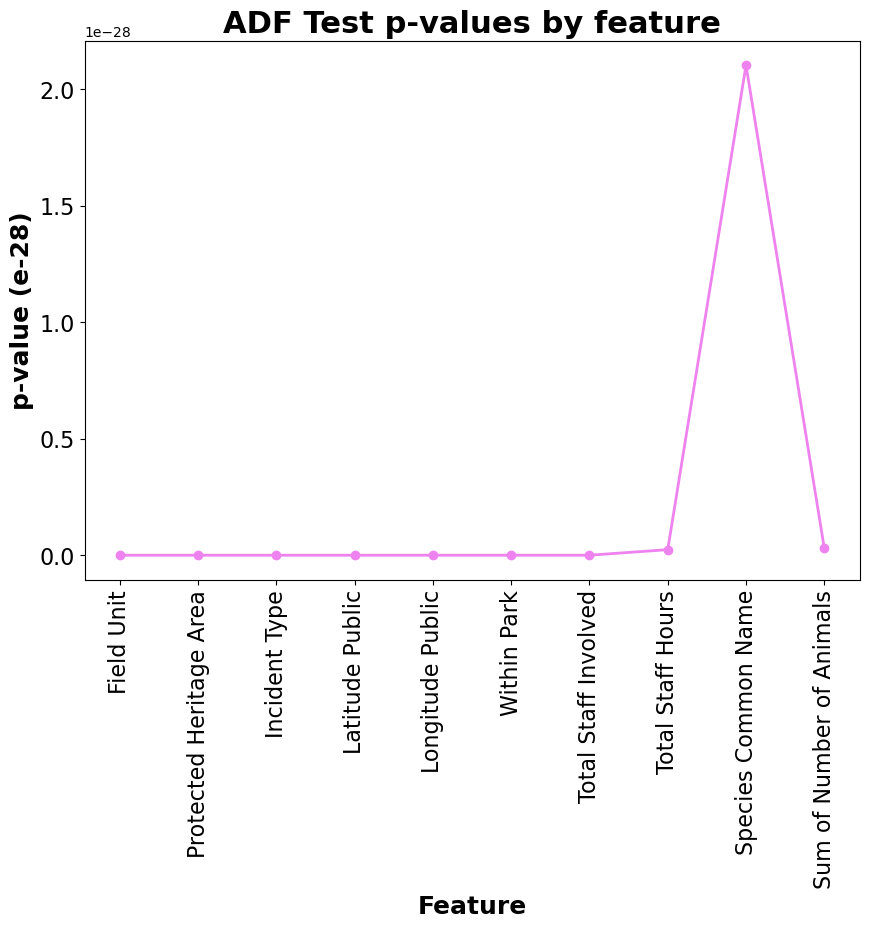

In [154]:
## important note: The plot shows the values at e-28. 
## I don't know if the plot adds much, can choose to keep or get rid of...

import matplotlib.pyplot as plt

plt.figure(figsize=(10,7));
plt.plot(ADF_pvalues.index, ADF_pvalues[0], marker="o", linewidth=2, color = "violet")
plt.ylabel('p-value (e-28)', fontweight="bold", size = 18)
plt.xlabel('Feature', fontweight="bold", size = 18);
plt.title('ADF Test p-values by feature', fontweight="bold", size = 22)
plt.xticks(size=16, rotation='vertical')
plt.yticks(size=16)
plt.show()